<a href="https://colab.research.google.com/github/Sagarjain93/car_prices/blob/main/car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Exploratory Data Analysis on Sales of Car Dataset**

##**1.Introduction**

This Exploratory Data Analysis (EDA) provides a clear overview of the car sales dataset, which includes important details such as car brand, model, manufacturing year, price, fuel type, transmission, and mileage. The primary goal is to uncover actionable insights that help us understand customer preferences, market trends, and factors driving sales performance.

Through careful data cleaning and visualization, we highlight key patterns and relationships that influence buying decisions and pricing. These insights will support strategic business decisions, improve sales forecasting, and identify opportunities for growth in a competitive automotive market. Ultimately, this analysis forms a data-driven foundation for optimizing marketing strategies and enhancing overall business performance.

we hypothesize that

  1.Higher car mileage (odometer) leads to lower selling prices.
  Rationale: Cars with more wear and tear are typically valued less.

  2.Cars in better condition sell for higher prices.
  Rationale: Buyers are willing to pay more for well-maintained vehicles.

  3.Certain brands (e.g., Toyota, Honda) retain value better than others.
  Rationale: Some brands are known for reliability and resale value.

  4.Automatic transmission cars sell for higher prices than manual ones.
  Rationale: Automatic vehicles are more popular and convenient for most buyers.

  5.Newer model years are associated with higher selling prices.
  Rationale: Newer vehicles have updated features and less wear.

  6.MMR (market value estimate) is positively correlated with actual selling price.
  Rationale: MMR is a pricing benchmark and should closely match real transactions.

  7.SUVs and trucks have higher average selling prices than sedans and hatchbacks.
  Rationale: Larger vehicles are generally more expensive.

  8.Sales volume or price varies by state due to demand or regional preferences.
  Rationale: Certain states may have more active used car markets or different price trends.

  9.Cars sold in winter months have lower prices compared to summer months.
  Rationale: Consumer demand may fluctuate seasonally.

  10.Dealer (seller) has an impact on selling price even for similar models.
  Rationale: Some dealers may offer better deals or add premiums.

##**2.Dataset Description**

The car sales dataset contains detailed information on vehicle listings and sales transactions. The key attributes included are:

* **Year:** The model year of the vehicle.

* **Make:** The manufacturer or brand of the car (e.g., Toyota, Ford).

* **Model:** The specific model name of the vehicle.

* **Trim:** The variant or version of the model, indicating different features or packages.

* **Body:** The body style of the vehicle (e.g., sedan, SUV, coupe).

* **Transmission:** The type of transmission system (e.g., automatic, manual).

* **VIN:** The unique Vehicle Identification Number, used to track individual cars.

* **State**: The U.S. state where the vehicle was sold or listed.

* **Condition**: The overall condition rating of the vehicle (e.g., excellent, good, fair).

* **Odometer:** The mileage on the vehicle at the time of sale, measured in miles.

* **Color**: The exterior color of the vehicle.

* **Interior**: The interior color or material of the vehicle.

* Seller: The entity or dealership selling the car.

* **MMR (Manheim Market Report)**: The wholesale market value estimate for the vehicle.

* **Selling Price:** The final sale price of the vehicle.

* **Sale Date:** The date when the sale transaction occurred.

This dataset provides a comprehensive view of car sales transactions, enabling analysis of price trends, vehicle popularity, market conditions, and sales performance across different regions and time periods.



#**3. Import Required Libraries**
We import Python libraries necessary for data manipulation and visualization

In [45]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent theme for all plots
sns.set(style = 'whitegrid')

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**4. Load The Dataset**
To begin the analysis, the car sales dataset is loaded directly from Google Drive. This approach ensures convenient access to the data stored in the cloud, especially when working in collaborative or cloud-based environments like Google Colab. By mounting Google Drive or using a shareable link, we can seamlessly import the dataset into our workspace for further processing and analysis.



In [47]:
df = pd.read_csv('/content/drive/MyDrive/colab/eda/6_Sales/car/car_prices.csv')



#**5. Initial Data Inspection**
In this step, we perform an initial examination of the dataset to understand its structure and quality. This includes previewing sample records, checking the dataset’s size, identifying data types, and detecting missing or duplicate values. These insights help inform subsequent data cleaning and analysis steps.

#**5.1. Preview First Few Records**
Display the first 5 rows to get an initial idea of the dataset.

In [48]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


#**5.2. Check The Dataset Shape**
Check the number of rows and columns in the datase

In [49]:
df.shape

(558837, 16)

#**5.3 Dataset Summary Overview**
Check for missing values and data types of each column.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


**Interpretation** The car sales dataset includes 558,837 records with 16 columns detailing vehicle specs like year, make, model, body type, transmission, mileage, condition, and selling price. Most key fields are complete, though transmission, body, and trim have moderate missing values. The saledate column needs conversion to datetime for temporal analysis. Overall, the dataset is well-structured for exploring pricing trends, brand performance, and sales patterns across U.S. states.

#**5.4. Statistical Summary of Numeric Columns**
Generate descriptive statistics such as mean, standard deviation, min, max, and quartiles for numerical columns.

In [51]:
df.select_dtypes(include='number').describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


#**5.5 Statistical Summary of Object Columns**
A statistical summary includes the count, number of unique values, most frequent value (top), and frequency of the top value for each categorical column.

In [52]:
df.select_dtypes(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,white,black,kia motors america inc,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,white,beige,kia motors america inc,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,gray,black,financial services remarketing (lease),Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,white,black,volvo na rep/world omni,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,gray,black,financial services remarketing (lease),Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...
558832,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,silver,black,avis corporation,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,white,black,i -5 uhlmann rv,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,black,black,financial services remarketing (lease),Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,white,black,enterprise vehicle exchange / tra / rental / t...,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


#**6. Data Cleaning/Preprocessing**
In this section, we assess the integrity and quality of the car sales dataset by examining the completeness, consistency, and data types of each column. We identify missing values, check for correct data types, and verify that the data aligns with expected formats and ranges. This validation ensures that subsequent analyses are based on reliable and accurate data.

## **6.1 Fix Data types**

In this section, we assess we will change the data type of saledate from object to datetime format.

In [53]:
#  = pd.Series()
df['saledate']= pd.to_datetime(df['saledate'], errors = 'coerce', utc= True)
df['saledate'] = pd.to_datetime(df['saledate'].dt.date)
df['saledate']

<ipython-input-53-b48bbbfcdabd>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate']= pd.to_datetime(df['saledate'], errors = 'coerce', utc= True)


,saledate
0,2014-12-16
1,2014-12-16
2,2015-01-14
3,2015-01-28
4,2014-12-18
...,...
558832,2015-07-09
558833,2015-07-08
558834,2015-07-08
558835,2015-07-08


## **6.2 Handling Missing Values**

We start by identifying and handling any missing values. This ensures the analysis isn't skewed by incomplete data.

In [54]:
# Check for missing values
df.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


The dataset has minimal missing values overall, with transmission, trim, and body showing the highest null counts. Key variables like sellingprice, odometer, and saledate are nearly complete and suitable for analysis after basic cleaning.

##**6.3. Dropping All Null rows**

In [55]:
df.dropna()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,2015-07-06
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,2015-07-08
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,2015-07-08
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,2015-07-08


## **6.4. Handle Duplicate Records**

Duplicate records can bias the analysis. We check for and remove any duplicates if found.

In [56]:
# Check for duplicate records
df.duplicated().sum()

np.int64(0)

**Interpretation:** There are no duplicate records in the dataset. This means that we don't need to remove any records before analyzing the dataset.

## **6.5. Standardize Column Names**

To make column names easier to work with, we convert them to lowercase and replace spaces with underscores.


In [57]:
# Check column names to see if they are consistent
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

##**6.6. Identify Numerical and Categorical Columns**
We categorize columns into numerical and categorical groups to streamline further analysis. This enables targeted handling during cleaning, visualization, and modeling.

In [58]:
# Identify categorical and numerical columns for targeted processing
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [59]:
# Display categorical columns
list(categorical_cols)

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller']

In [60]:
# Display numerical columns
list(numerical_cols)

['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [61]:
df['saledate'].dtype

dtype('<M8[ns]')

##**6.7. Standardize Categorical Features and Explore Unique Values**

###**6.7. A. Explore Unique Values in Categorical Features**

In [62]:
# Display unique values for each categorical feature

for col in categorical_cols:
  print(f"Unique values in {col}:")
  print(df[col].unique())
  print("\n")

Unique values in make:
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']


Unique values in model:
['Sorento' '3

## **6.8. Outlier Detections for Numerical Features**

In this step, we investigate potential outliers in the numerical columns using boxplots. Outliers can indicate data entry errors or unusual behavior.

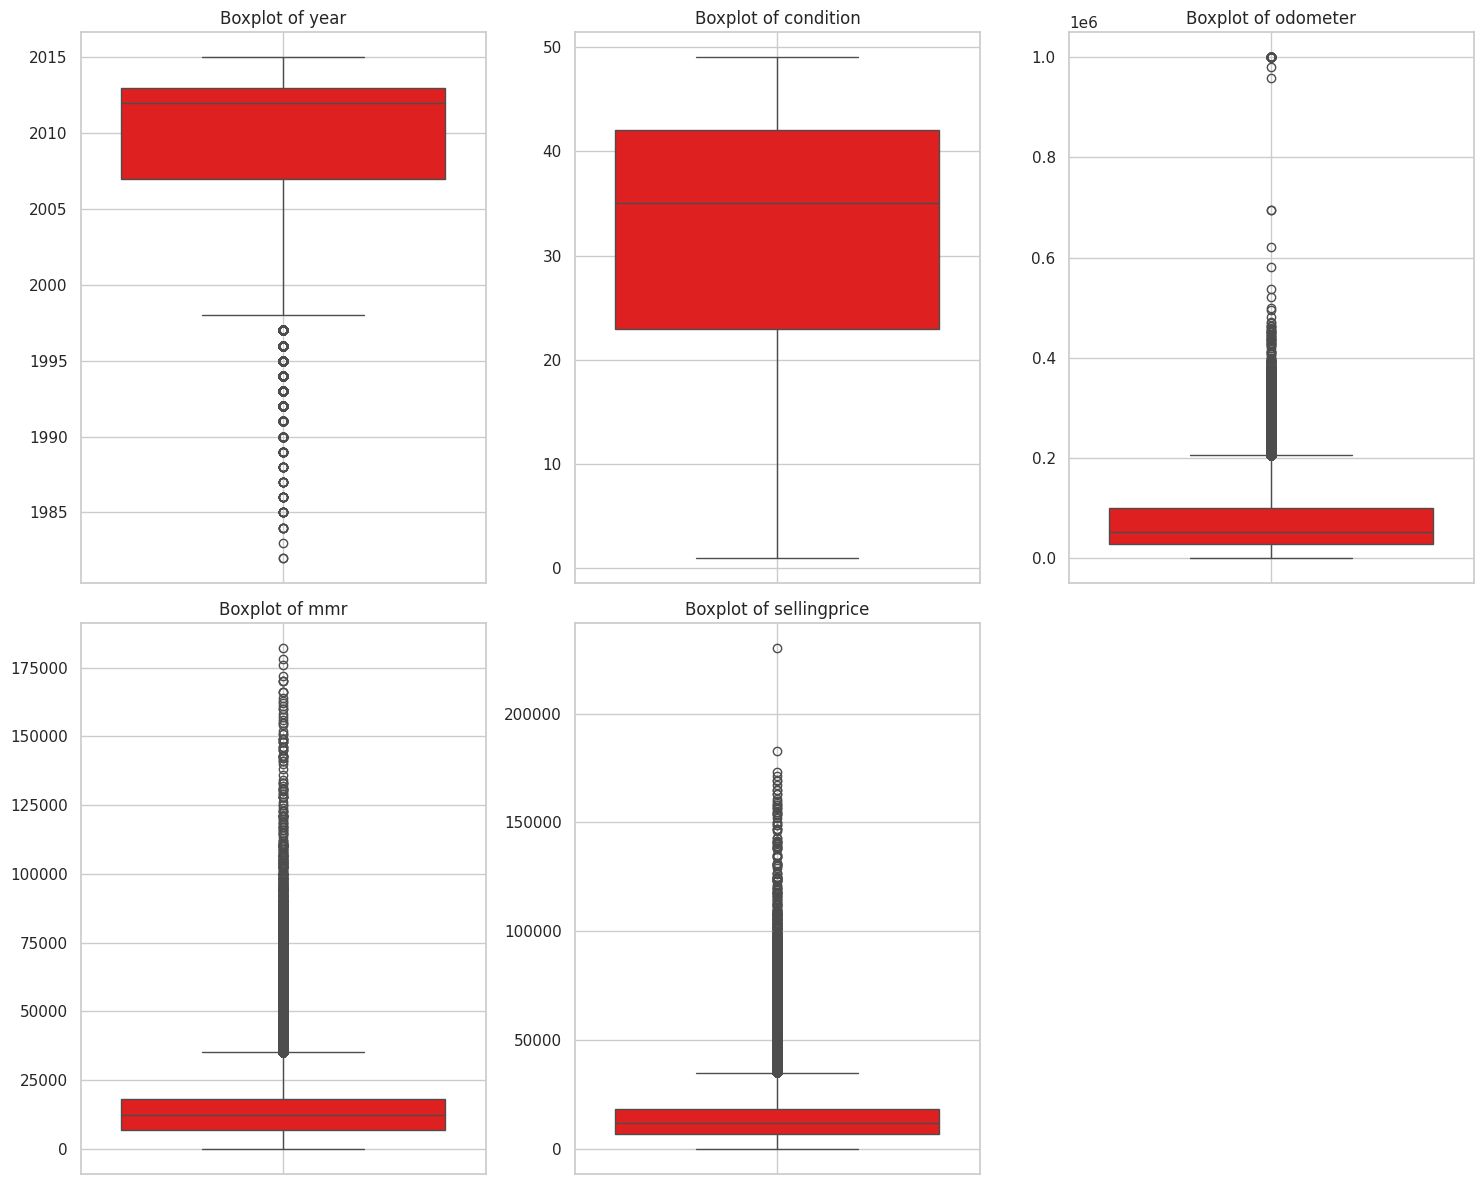

In [72]:
import math

# Assume numerical_cols is a list of your numerical columns
num_plots = len(numerical_cols)

# Automatically calculate rows and columns (e.g., 3 columns per row)
cols = 3
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(5 * cols, 6 * rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[col], color="red")
    plt.title(f"Boxplot of {col}")
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()


**Interpretations**

**YEAR** - Most of the cars are from 2005 to 2015 ,several cars with year before 2000 , and outlier as close to 1980s.

**CONDITION** - The condition range is from 20 - 45 , with few entries close to 0 and above 47.

**ODOMETER** - Most of car driven are below 2,00,000 . But there are extreme outliers upto 10,00,0000.

**MMR** - Highly skewed with large quantity of low values and there are few outliers above 1,75,000.

**SELLING PRICE** - Most of the car values is below 50,000 , but there are some car that go above 2,00,000

##**6.9. B. Statistical Detection of Outliers using IQR**
In addition to visual inspection through boxplots, we use the IQR method to programmatically detect potential outliers in the numerical features. This helps in identifying the number and position of values that lie far outside the normal range and could distort our analysis.

In [86]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # print(f"\n{column}:")
    # # print(f"  IQR = {IQR:.2f}")
    # print(f"  Outlier lower bound: {lower_bound:.2f}")
    # print(f"  Outlier upper bound: {upper_bound:.2f}")
    # print(f"  Number of outliers: {outliers.shape[0]}")

    return outliers

    # Loop through numerical columns and report number of outliers in each
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}:      {len(outliers)} outliers detected")


year:      7711 outliers detected
condition:      0 outliers detected
odometer:      1281 outliers detected
mmr:      1911 outliers detected
sellingprice:      1115 outliers detected


#**7. Exploratory Data Analysis - Visualization and Insights**

Moving forward, we will enhance our visual analysis by exploring deeper patterns and relationships within the data. This includes identifying how different features interact with each other and influence key outcomes, such as pricing. We will also aim to uncover any hidden trends or group-level behaviors that may not be immediately visible through basic plots. These visual insights will guide our understanding of the data and support the next steps in modeling and decision-making.

##**7.1. Univariate Analysis**
Univariate Analysis help understand the distribution and characteristics of individual variables within the dataset. In this step, we explore each feature independently to identify patterns, dominant categories, central tendency, spread, and potential anomalies.

In [87]:
df.columns


Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

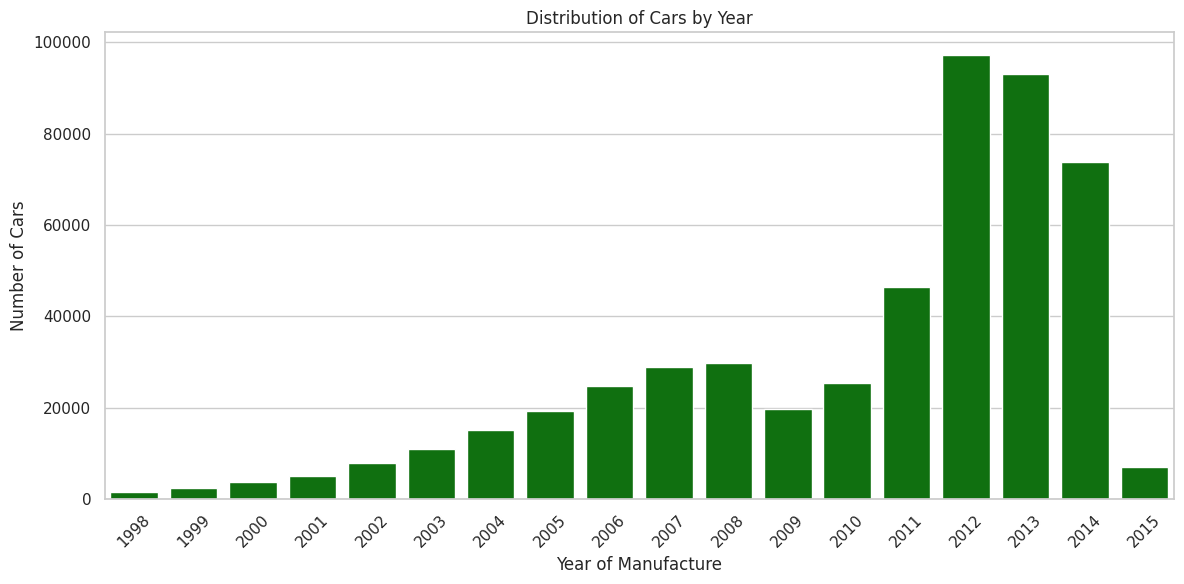

In [104]:
# Univariate anaysis of year
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, order=sorted(df['year'].dropna().unique()),color="green")
plt.title('Distribution of Cars by Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


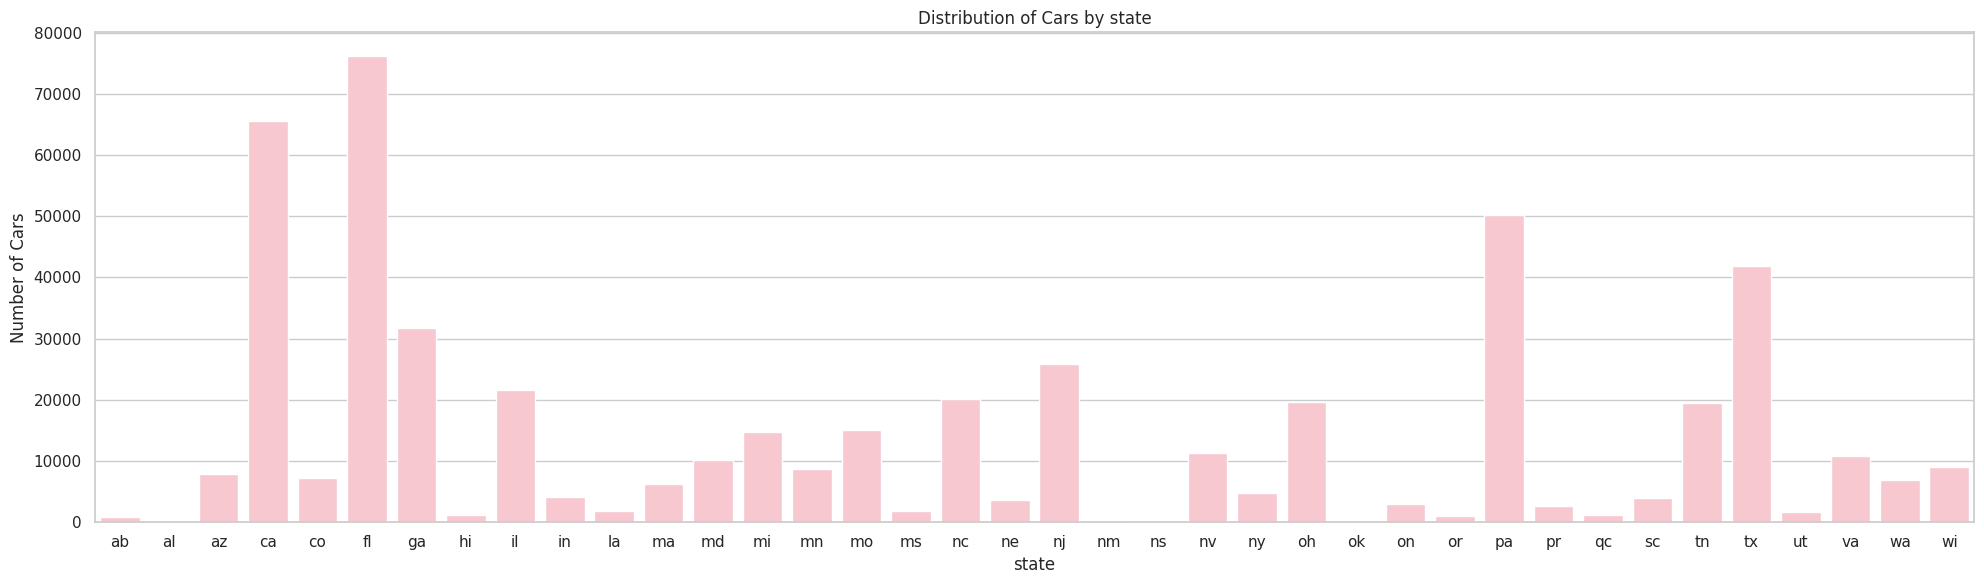

In [121]:
# Univariate analysis of state
plt.figure(figsize=(20, 6))
sns.countplot(x='state', data=df, order=sorted(df['state'].dropna().unique()),color="pink")
plt.title('Distribution of Cars by state')
plt.xlabel('state')
plt.ylabel('Number of Cars')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

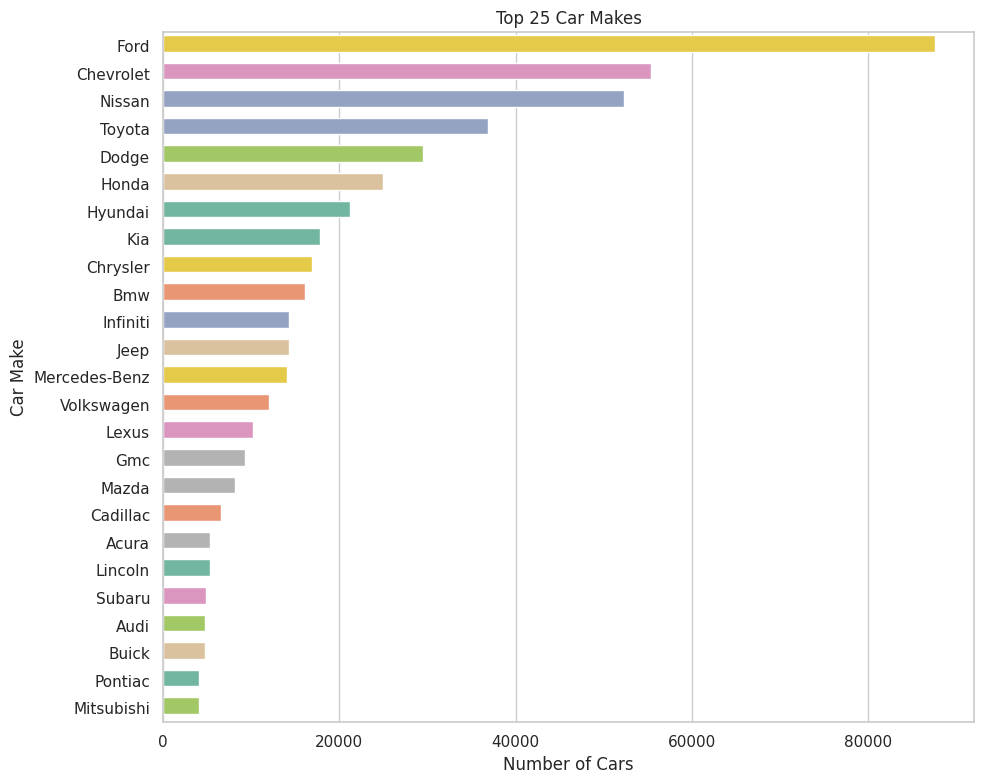

In [133]:
#  Get top 25 car makes
top_25_makes = df['make'].value_counts().nlargest(25).index

#  Filter the DataFrame for top 25
df_top_25 = df[df['make'].isin(top_25_makes)]


plt.figure(figsize=(10, 8))
make_order = df_top_25['make'].value_counts().index

ax = sns.countplot(
    y='make',
    data=df_top_25,
    order=make_order,
    hue='make',
    palette='Set2',
    legend=False
)

# Optional spacing
for bar in ax.patches:
    bar.set_height(0.6)

plt.title('Top 25 Car Makes')
plt.xlabel('Number of Cars')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()


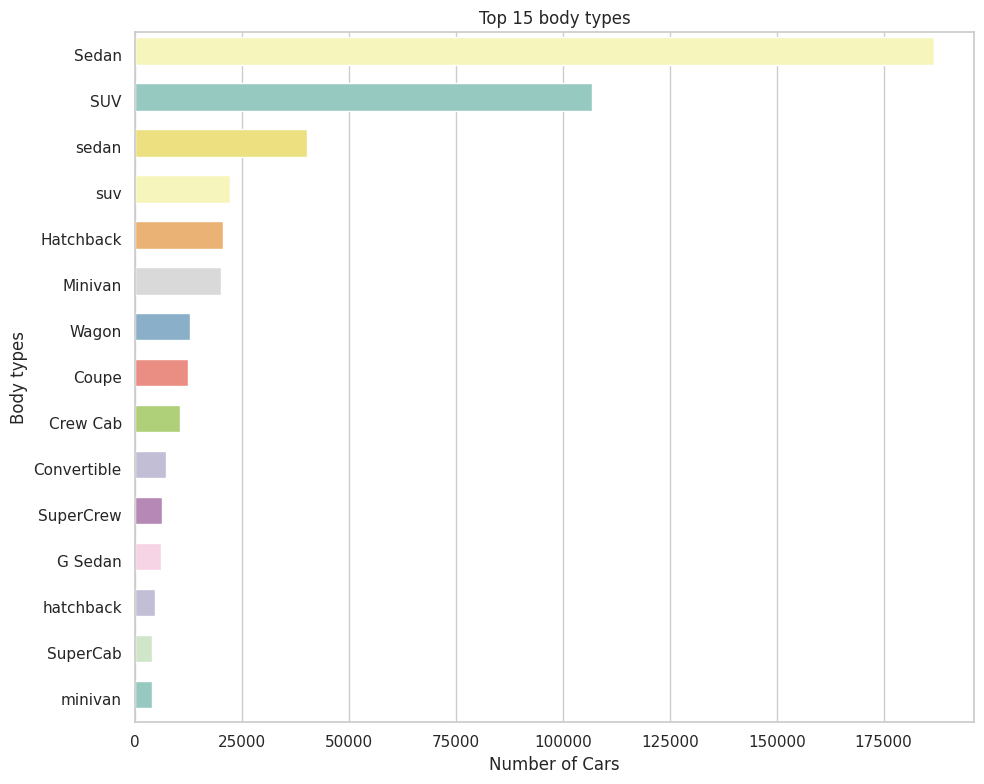

In [135]:
#  Get top 15 car body
top_15 = df['body'].value_counts().nlargest(15).index

#  Filter the DataFrame for top 15
df_top_15 = df[df['body'].isin(top_15)]


plt.figure(figsize=(10, 8))
make_order = df_top_15['body'].value_counts().index

ax = sns.countplot(
    y='body',
    data=df_top_15,
    order=make_order,
    hue='body',
    palette='Set3',
    legend=False
)

# Optional spacing
for bar in ax.patches:
    bar.set_height(0.6)

plt.title('Top 15 body types')
plt.xlabel('Number of Cars')
plt.ylabel('Body types')
plt.tight_layout()
plt.show()

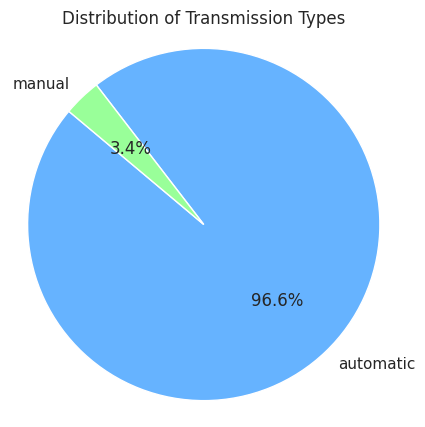

In [155]:
# Count the frequency of each transmission type
transmission_counts = df['transmission'].value_counts()

# Plot pie chart
plt.figure(figsize=(5,5))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title('Distribution of Transmission Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

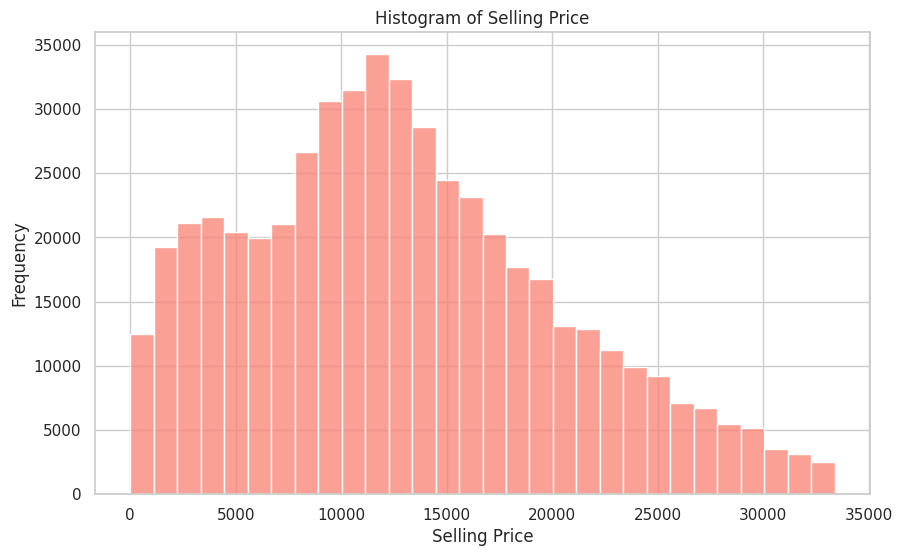

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['sellingprice'], bins=30, kde=False, color='salmon')
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


In [153]:
df['mmr'].value_counts()

,count
mmr,
12500.0,1738
11650.0,1736
11600.0,1723
12150.0,1697
11750.0,1694
...,...
100.0,3
50.0,2
75.0,2


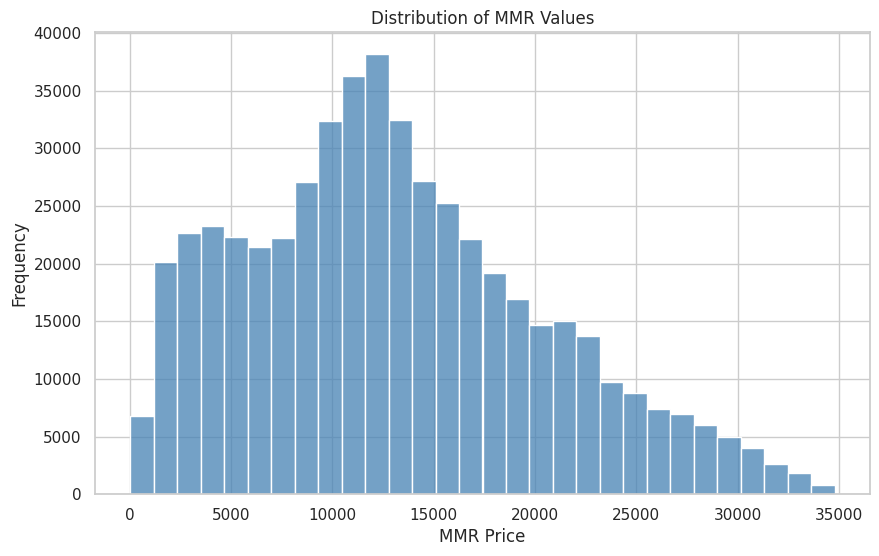

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['mmr'], bins=30, color='steelblue')
plt.title('Distribution of MMR Values')
plt.xlabel('MMR Price')
plt.ylabel('Frequency')
plt.show()
